Modelling and simulation for one-day cricket

This project is concerned with the simulation of one-day cricket matches. Given that only a finite
number of outcomes can occur on each ball that is bowled, a discrete generator on a finite set is developed
where the outcome probabilities are estimated from historical data involving one-day international cricket
matches. The probabilities depend on the batsman, the bowler, the number of wickets lost, the number of
balls bowled and the innings. The proposed simulator appears to do a reasonable job at producing realistic
results. The simulator allows investigators to address complex questions involving one-day cricket matches.

The data Taken here is of one day cricket from 2006 to 2017 of 21 teams in cricket. For the caluculation purpose later we use 
only 10 teams (teams who have played more than 50 matches).

The objective of the project is to predict the outcome of each ball based of diiferent factors such as batsman, bowler, innings,
runs scored till now, wickets etc.
Also we have to predict the batting order in the international cricket.

For ease purpose I have defined the runsperball as the target variable where outcome is the classification number
0=0 runs scored/wicket
1=1 runs scored
2=2 runs scored
3=3 runs scored
4=4 runs scored
6=6 runs scored

I have first fitted the data into a random forest classifier and later with SVC and PyMC

In [1]:
#Loading all Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data=pd.read_excel(r'C:\Users\91810\Desktop\\internship\data\data_cric.xlsx')

In [5]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runperball,striker,non-striker,total,runs_last_5,wickets_last_5
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,301,0,0
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,301,0,0
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,301,4,0
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,2,0,0,301,6,0
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,0,0,0,301,6,0


In [6]:
data.isnull().any()

mid               False
date              False
venue             False
bat_team          False
bowl_team         False
batsman           False
bowler            False
runs              False
wickets           False
overs             False
runperball        False
striker           False
non-striker       False
total             False
runs_last_5       False
wickets_last_5    False
dtype: bool

In [7]:
#As we can see that there is no null values in the data

In [8]:
print('total number of matches',data['mid'].nunique())

total number of matches 1188


In [9]:
print('total number of balls',data['runperball'].sum())

total number of balls 297585


In [10]:
data.describe(include='all')

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runperball,striker,non-striker,total,runs_last_5,wickets_last_5
count,350899.000000,350899,350899,350899,350899,350899,350899,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
unique,NaN,1042,136,21,21,938,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2007-02-04 00:00:00,Shere Bangla National Stadium,Australia,India,KC Sangakkara,Shahid Afridi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,23577,44876,45141,6822,4780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2006-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,594.360426,NaN,NaN,NaN,NaN,NaN,NaN,114.801661,2.974970,24.052899,0.848065,35.180129,12.427944,255.355387,23.548303,0.669814
std,343.605128,NaN,NaN,NaN,NaN,NaN,NaN,77.665959,2.298959,14.235439,1.252168,28.115264,15.019181,62.354412,11.042974,0.833895
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000
25%,296.000000,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,1.000000,11.600000,0.000000,13.000000,2.000000,217.000000,17.000000,0.000000


In [11]:
data.shape

(350899, 16)

In [12]:
# As we see in the describe table the most hits are for KC Sangakara
bat_kcsan=data[data['batsman']== 'KC Sangakkara']

In [13]:
bat_kcsan.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runperball,striker,non-striker,total,runs_last_5,wickets_last_5
1399,5,2006-06-17,Lord's,Sri Lanka,England,KC Sangakkara,TT Bresnan,131,2,22.5,1,67,0,257,19,1
1400,5,2006-06-17,Lord's,Sri Lanka,England,KC Sangakkara,TT Bresnan,131,2,22.6,0,67,0,257,18,1
1402,5,2006-06-17,Lord's,Sri Lanka,England,KC Sangakkara,SI Mahmood,132,2,23.2,0,68,0,257,18,1
1403,5,2006-06-17,Lord's,Sri Lanka,England,KC Sangakkara,SI Mahmood,136,2,23.3,4,68,4,257,22,1
1404,5,2006-06-17,Lord's,Sri Lanka,England,KC Sangakkara,SI Mahmood,136,2,23.4,0,68,4,257,22,1


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

<Figure size 720x1152 with 0 Axes>

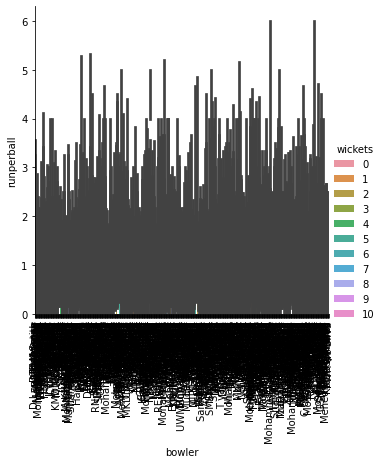

In [14]:
fig = plt.gcf()
fig.set_size_inches( 10, 16)
sns.catplot(x='bowler',
               y='runperball',
               hue='wickets',
              #col='engine_location',
              data=data,
              kind='bar')

plt.xticks(rotation=90)


In [15]:
print('total number of unique batsman are ',data['batsman'].nunique())
print('total number of unique bowlers are ',data['bowler'].nunique())

total number of unique batsman are  938
total number of unique bowlers are  709


In [16]:
print('count of matches played by the different teams are\n',data.groupby('bat_team')['mid'].nunique())

count of matches played by the different teams are
 bat_team
Afghanistan              26
Asia XI                   3
Australia               149
Bangladesh               82
Bermuda                   6
Canada                    9
England                 109
Hong Kong                 4
India                   112
Ireland                  26
Kenya                    11
Netherlands               8
New Zealand             101
Pakistan                105
Papua New Guinea          1
Scotland                 21
South Africa            107
Sri Lanka               144
United Arab Emirates      7
West Indies              82
Zimbabwe                 75
Name: mid, dtype: int64


In [17]:
# for our analysis we will take the teams which have played 50 and more matches.

In [18]:
data1=(data['bat_team']==('Australia','Bangladesh','England','India','New Zealand','Pakistan','South Africa','Sri Lanka',
                              'West Indies','Zimbabwe'))

In [19]:
data1.head()

0    False
1    False
2    False
3    False
4    False
Name: bat_team, dtype: bool

In [20]:
search_values = ['Australia','Bangladesh','England','India','New Zealand','Pakistan','South Africa','Sri Lanka','West Indies','Zimbabwe']
data1=data[data.bat_team.str.contains('|'.join(search_values ))]

In [21]:
data1.shape

(316097, 16)

In [22]:
data1.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runperball,striker,non-striker,total,runs_last_5,wickets_last_5
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,301,0,0
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,301,0,0
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,301,4,0
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,2,0,0,301,6,0
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,0,0,0,301,6,0


In [23]:
search_values = ['Australia','Bangladesh','England','India','New Zealand','Pakistan','South Africa','Sri Lanka','West Indies','Zimbabwe']
data2=data1[data1.bowl_team.str.contains('|'.join(search_values ))]

In [24]:
data2.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runperball,striker,non-striker,total,runs_last_5,wickets_last_5
315,2,2006-09-05,The Rose Bowl,England,Pakistan,ME Trescothick,Shoaib Akhtar,0,1,0.1,0,0,0,271,0,1
316,2,2006-09-05,The Rose Bowl,England,Pakistan,IR Bell,Shoaib Akhtar,1,1,0.2,1,1,0,271,1,1
317,2,2006-09-05,The Rose Bowl,England,Pakistan,AJ Strauss,Shoaib Akhtar,1,1,0.3,0,1,0,271,1,1
318,2,2006-09-05,The Rose Bowl,England,Pakistan,AJ Strauss,Shoaib Akhtar,5,1,0.4,4,4,1,271,5,1
319,2,2006-09-05,The Rose Bowl,England,Pakistan,AJ Strauss,Shoaib Akhtar,6,1,0.5,1,5,1,271,6,1


In [25]:
data2.shape

(297322, 16)

In [26]:
data2.describe(include='all')

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runperball,striker,non-striker,total,runs_last_5,wickets_last_5
count,297322.000000,297322,297322,297322,297322,297322,297322,297322.000000,297322.000000,297322.000000,297322.000000,297322.000000,297322.000000,297322.000000,297322.000000,297322.000000
unique,NaN,909,119,10,10,656,495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2007-02-04 00:00:00,Shere Bangla National Stadium,Australia,India,KC Sangakkara,Shahid Afridi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,633,21763,43034,43782,6439,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2006-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,577.832337,NaN,NaN,NaN,NaN,NaN,NaN,115.569060,2.938235,24.110302,0.852100,35.661108,12.606992,256.859714,23.668087,0.661418
std,336.352365,NaN,NaN,NaN,NaN,NaN,NaN,77.870954,2.274272,14.246346,1.248606,28.371001,15.144229,60.849915,10.986442,0.826815
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000
25%,292.000000,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,1.000000,11.600000,0.000000,14.000000,2.000000,220.000000,17.000000,0.000000


In [27]:
print('total number of matches',data2['mid'].nunique())
print('total number of balls',data2['runperball'].sum())
print('total number of unique batsman are ',data2['batsman'].nunique())
print('total number of unique bowlers are ',data2['bowler'].nunique())

total number of matches 1004
total number of balls 253348
total number of unique batsman are  656
total number of unique bowlers are  495


In [28]:
print('count of matches played by the different teams are\n',data2.groupby('bat_team')['mid'].nunique())

count of matches played by the different teams are
 bat_team
Australia       143
Bangladesh       76
England         103
India           110
New Zealand      95
Pakistan         98
South Africa     99
Sri Lanka       137
West Indies      79
Zimbabwe         64
Name: mid, dtype: int64


In [39]:
data2.groupby('venue')['bat_team'].value_counts().sort_values(ascending=False)

venue                          bat_team    
Shere Bangla National Stadium  Bangladesh      9295
R Premadasa Stadium            Sri Lanka       5368
Harare Sports Club             Zimbabwe        5009
Sydney Cricket Ground          Australia       4278
Melbourne Cricket Ground       Australia       3617
                                               ... 
The Rose Bowl                  India            142
Trent Bridge                   South Africa     142
Zahur Ahmed Chowdhury Stadium  West Indies      134
Queenstown Events Centre       New Zealand      128
Edgbaston                      India            124
Name: bat_team, Length: 436, dtype: int64

In [38]:
data2.groupby('venue')['bat_team'].nunique().sort_values(ascending=False)
#print('count of matches played by the different teams are\n',data2.groupby('venue')['bat_team'].nunique()>10)

venue
Shere Bangla National Stadium                                      10
Adelaide Oval                                                       9
Harare Sports Club                                                  9
Sawai Mansingh Stadium                                              8
Kennington Oval                                                     8
                                                                   ..
Indian Petrochemicals Corporation Limited Sports Complex Ground     1
Holkar Cricket Stadium                                              1
Sedgars Park                                                        1
Manuka Oval                                                         1
Sector 16 Stadium                                                   1
Name: bat_team, Length: 119, dtype: int64

In [30]:
# now we will do analysis with these 10 teams with date range from 2006 to 2017(as in the describe data)

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
enc = OneHotEncoder(handle_unknown='ignore')

In [42]:
# making object variables into categorical by getdummies method

In [43]:
one_hot = pd.get_dummies(data2['venue'])
#one_hot1 = pd.get_dummies(data2['bat_team'])

In [44]:
one_hot2 = pd.get_dummies(data2['bowl_team'])
one_hot3 = pd.get_dummies(data2['batsman'])
one_hot4 = pd.get_dummies(data2['bowler'])

In [45]:
data3=data2.join(one_hot)
data4=data3.join(one_hot2)
data5=data4.join(one_hot3)
data6=data4.join(one_hot4)
#data7=data6.join(one_hot4)
data6.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,...,Wahab Riaz,XJ Doherty,YK Pathan,YS Chahal,Yasir Arafat,Yasir Shah,Younis Khan,Yuvraj Singh,Z Khan,Zulfiqar Babar
315,2,2006-09-05,The Rose Bowl,England,Pakistan,ME Trescothick,Shoaib Akhtar,0,1,0.1,...,0,0,0,0,0,0,0,0,0,0
316,2,2006-09-05,The Rose Bowl,England,Pakistan,IR Bell,Shoaib Akhtar,1,1,0.2,...,0,0,0,0,0,0,0,0,0,0
317,2,2006-09-05,The Rose Bowl,England,Pakistan,AJ Strauss,Shoaib Akhtar,1,1,0.3,...,0,0,0,0,0,0,0,0,0,0
318,2,2006-09-05,The Rose Bowl,England,Pakistan,AJ Strauss,Shoaib Akhtar,5,1,0.4,...,0,0,0,0,0,0,0,0,0,0
319,2,2006-09-05,The Rose Bowl,England,Pakistan,AJ Strauss,Shoaib Akhtar,6,1,0.5,...,0,0,0,0,0,0,0,0,0,0


In [46]:
one_hot1 = pd.get_dummies(data2['bat_team'])
#one_hot2 = pd.get_dummies(data2['bowl_team'])
data7=data6.join(one_hot1,how='left',lsuffix='_left', rsuffix='_right')

In [47]:
data7.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,...,Australia_right,Bangladesh_right,England_right,India_right,New Zealand_right,Pakistan_right,South Africa_right,Sri Lanka_right,West Indies_right,Zimbabwe_right
315,2,2006-09-05,The Rose Bowl,England,Pakistan,ME Trescothick,Shoaib Akhtar,0,1,0.1,...,0,0,1,0,0,0,0,0,0,0
316,2,2006-09-05,The Rose Bowl,England,Pakistan,IR Bell,Shoaib Akhtar,1,1,0.2,...,0,0,1,0,0,0,0,0,0,0
317,2,2006-09-05,The Rose Bowl,England,Pakistan,AJ Strauss,Shoaib Akhtar,1,1,0.3,...,0,0,1,0,0,0,0,0,0,0
318,2,2006-09-05,The Rose Bowl,England,Pakistan,AJ Strauss,Shoaib Akhtar,5,1,0.4,...,0,0,1,0,0,0,0,0,0,0
319,2,2006-09-05,The Rose Bowl,England,Pakistan,AJ Strauss,Shoaib Akhtar,6,1,0.5,...,0,0,1,0,0,0,0,0,0,0


In [48]:
# Extracting date, month and year

In [49]:
from time import time
import os
data7['date']=pd.to_datetime(data7['date'])

In [50]:
data7['month']=data7['date'].dt.month
data7['year']=data7['date'].dt.year
data7['date']=data7['date'].dt.day

In [51]:
columns1=['date','venue','bat_team','bowl_team','batsman','bowler']

In [52]:
data_final=data7.drop(columns=columns1)

In [53]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297322 entries, 315 to 350898
Columns: 646 entries, mid to year
dtypes: float64(1), int64(11), uint8(634)
memory usage: 219.3 MB


In [54]:
# Model Building

In [55]:

from sklearn.model_selection import train_test_split

In [56]:
X=data_final.drop(columns='runperball')

In [57]:
y=data_final['runperball']

In [58]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
#print("Explained Variance:Eigen Values\n",pca.explained_variance_)
#print("PCA Components:Eigen Vectors\n",pca.components_)
ratio=np.cumsum(pca.explained_variance_ratio_)
print("pca.explained_variance_ratio is :\n",ratio)

pca.explained_variance_ratio is :
 [0.91135137 0.96967464 0.99378921 0.99811999 0.99927178 0.99973045
 0.99984843 0.99995676 0.9999659  0.9999688  0.99997048 0.9999718
 0.99997302 0.99997412 0.99997514 0.99997608 0.999977   0.99997788
 0.99997875 0.99997958 0.99998038 0.99998115 0.9999819  0.99998262
 0.99998331 0.99998393 0.99998452 0.99998505 0.99998548 0.99998576
 0.99998603 0.99998625 0.99998645 0.99998664 0.99998682 0.999987
 0.99998717 0.99998732 0.99998748 0.99998762 0.99998776 0.99998788
 0.99998801 0.99998813 0.99998825 0.99998837 0.99998848 0.99998859
 0.9999887  0.99998881 0.99998892 0.99998902 0.99998912 0.99998922
 0.99998932 0.99998942 0.99998952 0.99998961 0.99998971 0.9999898
 0.9999899  0.99998999 0.99999008 0.99999017 0.99999026 0.99999035
 0.99999044 0.99999052 0.9999906  0.99999069 0.99999077 0.99999085
 0.99999092 0.999991   0.99999108 0.99999116 0.99999123 0.99999131
 0.99999138 0.99999146 0.99999153 0.9999916  0.99999167 0.99999174
 0.9999918  0.99999187 0.999991

Max. % Variance of total explained by no. of factors
no. of factors, % variance explained
1               91.14%
2               96.97%
3               99.38%
4               99.81%
5               99.93%
6               99.97%
7               99.98%
8               100.00%
9               100.00%
10               100.00%
11               100.00%
12               100.00%
13               100.00%
14               100.00%
15               100.00%
16               100.00%
17               100.00%
18               100.00%
19               100.00%
20               100.00%
21               100.00%
22               100.00%
23               100.00%
24               100.00%
25               100.00%
26               100.00%
27               100.00%
28               100.00%
29               100.00%
30               100.00%
31               100.00%
32               100.00%
33               100.00%
34               100.00%
35               100.00%
36               100.00%
37               100.00%
3

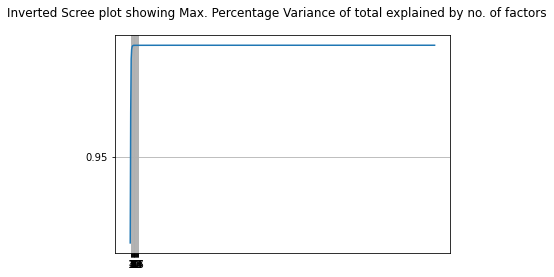

In [59]:
print("Max. % Variance of total explained by no. of factors")
print("no. of factors, % variance explained")
for i in range(1,100):
    print(i, "             ",  "{:0.2%}".format(ratio[i-1]))

plt.xticks(np.arange(1, 18, 1))
plt.yticks(np.arange(0, 1.0, 0.05))
plt.suptitle('Inverted Scree plot showing Max. Percentage Variance of total explained by no. of factors')
plt.grid()
plt.plot(ratio)
plt.show()

In [93]:
from sklearn.svm import SVC
#PC is Principal Components
for n in range(10,12):
    pca = PCA(n_components=n)
    X_transformed = pca.fit_transform(X)
    #X_test1 = pca.fit_transform(X_test)
    
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=10)# splitting the data with PC
    print("train and test data is :",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    # Training an SVC using the PCs instead of the actual attributes 
    model = SVC()
    model.fit(X_train,y_train)
    score_PCs = model.score(X_test,y_test )
    print("score with principal components ",n,'is',score_PCs)
    score_PCs = model.score(X_test, y_test)
    print("score with principal components ",n,'is',score_PCs)

train and test data is : (222991, 10) (74331, 10) (222991,) (74331,)
score with principal components  10 is 0.5392501109900311
score with principal components  10 is 0.5392501109900311
train and test data is : (222991, 11) (74331, 11) (222991,) (74331,)
score with principal components  11 is 0.5392232043158306
score with principal components  11 is 0.5392232043158306


In [94]:
y_predict=model.predict(X_test)

In [96]:
#plotting confusion matrix for model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predict,y_test)
cm

array([[31962, 17890,  2543,   412,  3578,    54,   403,     2],
       [ 5435,  8119,  1456,   123,  1733,    41,   576,     4],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0]],
      dtype=int64)

confusion matrix using heatmap:


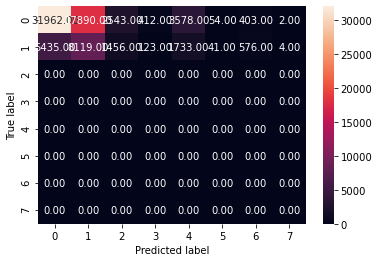

In [97]:
print('confusion matrix using heatmap:')
sns.heatmap(cm, annot=True,  fmt='.2f' )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show() 

In [98]:
from sklearn.metrics import classification_report
#target_names = ['0:T-shirt/top', '1:Trouser','2:Pullover', 
                    # '3:Dress','4:Coat', '5:Sandal', '6:Shirt', 
                    # '7:Sneaker', '8:Bag', '9:Ankle boot']
#print(classification_report(y_pred_model2,test_Y,target_names=target_names))
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.85      0.56      0.68     56844
           1       0.31      0.46      0.37     17487
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.54     74331
   macro avg       0.15      0.13      0.13     74331
weighted avg       0.73      0.54      0.61     74331



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [66]:
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [76]:
X_1=X.sample(frac=1)

In [77]:
X_1.head(5)

,mid,runs,wickets,overs,striker,non-striker,total,runs_last_5,wickets_last_5,AMI Stadium,...,England_right,India_right,New Zealand_right,Pakistan_right,South Africa_right,Sri Lanka_right,West Indies_right,Zimbabwe_right,month,year
95707,323,21,1,7.3,10,8,225,17,1,0,...,0,0,0,0,0,0,0,0,2,2009
25571,85,171,2,31.5,88,51,303,36,0,0,...,0,0,0,0,0,1,0,0,4,2007
45910,155,7,0,3.5,2,2,201,7,0,0,...,0,0,0,0,0,0,0,1,9,2006
103491,351,129,2,24.3,61,25,290,23,0,0,...,0,0,0,0,0,1,0,0,1,2009
101295,343,65,5,16.3,14,6,188,13,2,0,...,0,1,0,0,0,0,0,0,6,2009


In [79]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier

for n in range(10,12):
    pca = PCA(n_components=n)

    X_transformed = pca.fit_transform(X_1)
    #X_test1 = pca.fit_transform(X_test)
   
    
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=10)# splitting the data with PC
    print("train and test data is :",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rfTree = RandomForestClassifier(n_estimators=20)
    rfTree.fit(X_train,y_train)
    rf_tr_score= rfTree.score(X_train,y_train)
    rf_test_score= rfTree.score(X_test,y_test)
    print("rfTree on train data ",rf_tr_score)
    print("rfTree on test data ",rf_test_score)


train and test data is : (222991, 10) (74331, 10) (222991,) (74331,)
rfTree on train data  0.9906812382562525
rfTree on test data  0.4205244110801684
train and test data is : (222991, 11) (74331, 11) (222991,) (74331,)
rfTree on train data  0.9900444412554766
rfTree on test data  0.42043023772046656


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, random_state=10)# splitting the data with PC
print("train and test data is :",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
rfTree = RandomForestClassifier()
rfTree.fit(X_train,y_train)
rf_tr_score= rfTree.score(X_train,y_train)
rf_test_score= rfTree.score(X_test,y_test)
print("rfTree on train data ",rf_tr_score)
print("rfTree on test data ",rf_test_score)

train and test data is : (222991, 645) (74331, 645) (222991,) (74331,)
rfTree on train data  0.9998834033660551
rfTree on test data  0.39718287121120394


In [52]:
from sklearn.svm import SVC

In [ ]:
# As in the paper 'Modelling and simulation for one day cricket' winbugs software is used.
#PyMC3 is a Python package for Bayesian statistical modeling and probabilistic machine learning which focuses 
#on advanced Markov chain Monte Carlo and variational fitting algorithms as stated in the paper

In [ ]:
#The pymc-learn project adopted and extended the template in pymc3-models to develop probabilistic versions of the 
#estimators in scikit-learn.
#This provides users with probabilistic models in a simple workflow that mimics the scikit-learn API.

In [54]:
#Bayesian Neural Networks
#Multilayer Perceptron Classifier

In [83]:
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'

In [1]:
import pymc3 as pm
np.random.seed(12345)
rc = {'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20, 'font.size': 20,
      'legend.fontsize': 12.0, 'axes.titlesize': 10, "figure.figsize": [12, 6]}
sns.set(rc = rc)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\91810\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


NameError: name 'np' is not defined

In [2]:
import pmlearn
from pmlearn.neural_network import MLPClassifier
print('Running on pymc-learn v{}'.format(pmlearn.__version__))

Running on pymc-learn v0.0.1.rc3


In [3]:
import theano
floatX = theano.config.floatX

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
model = MLPClassifier()

In [61]:
model.fit(X_train, y_train)

SystemError: <class 'range'> returned a result with an error set
Apply node that caused the error: Elemwise{Composite{(i0 * (i1 - sqr(i2)))}}[(0, 0)](ScipyGer{destructive}.0, TensorConstant{(1, 1) of 1.0}, Elemwise{Tanh}[(0, 0)].0)
Toposort index: 90
Inputs types: [TensorType(float64, matrix), TensorType(float64, (True, True)), TensorType(float64, matrix)]
Inputs shapes: [(208125, 5), (1, 1), (208125, 5)]
Inputs strides: [(40, 8), (8, 8), (40, 8)]
Inputs values: ['not shown', array([[1.]]), 'not shown']
Outputs clients: [[Dot22(Elemwise{Composite{(i0 * (i1 - sqr(i2)))}}[(0, 0)].0, w_1_2_vi_replacement.T), Gemm{no_inplace}(w_1_2_vi_replacement, TensorConstant{1.0}, InplaceDimShuffle{1,0}.0, Elemwise{Composite{(i0 * (i1 - sqr(i2)))}}[(0, 0)].0, Elemwise{neg,no_inplace}.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [ ]:
model.plot_elbo()

In [ ]:
pm.traceplot(model.trace);

In [ ]:
pm.forestplot(model.trace, varnames=["w_in_1"]);

In [ ]:
model.score(X_test, y_test)

In [ ]:
y_pred = model.predict(X_test)